## Métodos de Otimização: Métodos de procura multidimensional

### Método de Newton - Diferenças finitas

__Imports:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import time
name = 'Newton' 
Start = time.time()

__Função Avaliada:__

In [2]:
x=np.zeros(2 , dtype = 'float')
G =np.zeros(2 , dtype = 'float')

def f(x,nFunc,nVar,countFunc):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    countFunc += 1
    return u,countFunc

__Método:__

In [3]:
def grad(x,countFunc):
    epsilon = 1.e-10
    nFunc = 5; Qvar = 2
    
    for i in range(0,len(x)):
        xtmp=x.copy()
        xtmp[i]=xtmp[i]+epsilon
        F_xtmp, countFunc = f(xtmp,nFunc,Qvar,countFunc)
        F_x, countFunc = f(x,nFunc,Qvar,countFunc)
        G[i]=(F_xtmp-F_x)/epsilon
    
    return G,countFunc

In [4]:
def hessian(x,countFunc,delta=1e-3):
    nFunc = 5; Qvar = 2
    n = len(x)
    output = np.zeros((n,n), dtype='float')
    for i in range(n):
        for j in range(n):
            ei = np.zeros(n)
            ei[i] = 1
            ej = np.zeros(n)
            ej[j] = 1
            f1,countFunc = f(x + delta * ei + delta * ej,nFunc,Qvar,countFunc)
            f2,countFunc = f(x + delta * ei - delta * ej,nFunc,Qvar,countFunc)
            f3,countFunc = f(x - delta * ei + delta * ej,nFunc,Qvar,countFunc)
            f4,countFunc = f(x - delta * ei - delta * ej,nFunc,Qvar,countFunc)
            numdiff = (f1-f2-f3+f4)/(4*delta*delta)
            output[i,j] = numdiff
    return output,countFunc

In [5]:
nFunc = 5; Qvar = 2; countFunc = 0

G=np.zeros(Qvar, dtype='float')
D2=np.zeros(Qvar, dtype='float')
D2_partial=np.zeros(Qvar, dtype='float')
xnew=np.zeros(Qvar, dtype='float')
xold=np.zeros(Qvar, dtype='float')
kmax=10; k=0
xold[0]=3; xold[1]=2; F0,countFunc = f(xold,nFunc,Qvar,countFunc)
layout = "{0:.5f}"
fHist = []

while k < kmax:
    k += 1
    # Calculo Gradiente
    G,countFunc = grad(xold,countFunc)

    # calcula a inversa do Hessiano
    H,countFunc = hessian(xold,countFunc)
    
    # Processo iterativo
    if np.linalg.det(H) == 0:
        print('Flag: Matriz Singular')
        xnew=xold-G
    else:
        Hinv = np.linalg.inv(H)
        xnew=xold-np.matmul(Hinv,G)
    
    #Atualiza xold
    xold = xnew.copy()
    
    #Calculo da função
    F,countFunc = f(xnew,nFunc,Qvar,countFunc)
    print(layout.format(xnew[0])+" "+layout.format(xnew[1])+" "+layout.format(F))
    fHist.append(F)

3.13960 2.27403 0.39791
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789


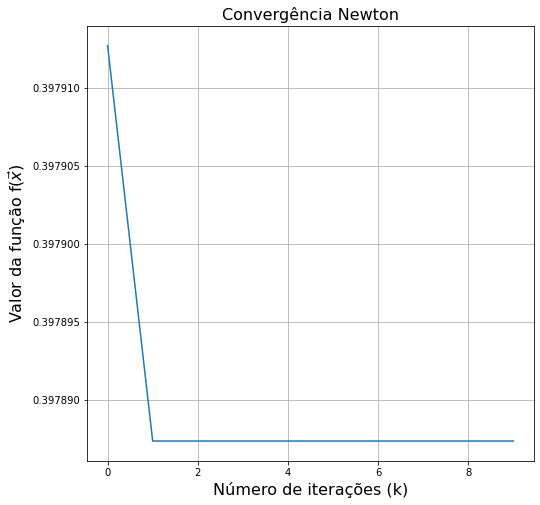

In [6]:
font = {
        'size': 16,
        }

plt.figure(figsize=(8,8))
plt.plot(np.arange(0,k),fHist)
plt.grid()
plt.title(f'Convergência {name}', fontdict=font)
plt.ylabel(r'Valor da função f($\vec{x}$)', fontdict=font)
plt.xlabel("Número de iterações (k)", fontdict=font)
plt.show()

In [7]:
print("Quantidade de chamadas da função obj = ", countFunc)
End = time.time()
print("Tempo de Execução =", End-Start, "s")	

Quantidade de chamadas da função obj =  211
Tempo de Execução = 3.6470370292663574 s
